# Assignment Tasks

# Part 1: Data Cleaning
- Load dataset using Pandas
- Convert `Ride Date` to datetime format
- Handle missing values ( `Driver , Total Fare` )
>Replace or drop logically
- Create new column: `Month` extracted from Ride Date
- Create new column: `Final Revenue = Total Fare - Discount`

- **Load dataset using Pandas**

In [1]:
import pandas as pd
car = pd.read_csv(r'C:\Users\ziaah\OneDrive\Desktop\Z_Work\My Work\Sir Raheel Task\ride_sharing_trip_data.csv')

- **Convert Ride Date to datetime format**

In [2]:
car.columns = car.columns.str.strip()

In [3]:
car['Ride Date'] = pd.to_datetime(car['Ride Date'], dayfirst=True)

- **Handle missing values ( Driver , Total Fare )**

In [4]:
# car = car.drop(columns=[' Ride Date'])

In [5]:
car['Driver']= car['Driver'].fillna(0)

In [6]:
car['Total Fare']= car['Total Fare'].fillna(0)

- **Create new column: Month extracted from Ride Date**

In [7]:
car['Month'] = car['Ride Date'].dt.to_period('M')

- **Create new column: Final Revenue = Total Fare - Discount**

In [8]:
car['Final Revenue'] = car['Total Fare'] - car['Discount Applied']

# Part 2: Data Analysis
**Answer the following with code + results:**
1. Total revenue (after discount) and total number of rides
2. Average fare per km by `Car Type`
3. Top 3 drivers by total revenue
4. City-wise number of rides and average passenger rating
5. Most used `Payment Method` and total revenue per method


**1. Total revenue (after discount) and total number of rides**

In [9]:
car['Final Revenue'].sum()

np.float64(129756.29999999999)

In [10]:
c1 = car['Ride ID'].nunique()
c1

200

**2. Average fare per km by Car Type**

In [11]:
car['Car Type'].value_counts()

Car Type
Business     51
Mini         42
Bike         38
Executive    36
Economy      33
Name: count, dtype: int64

In [12]:
car['Fare per km'] =car['Total Fare'] / car['Distance (km)']
avg_fare_per_km = car.groupby('Car Type')['Fare per km'].mean().reset_index()
avg_fare_per_km

,Car Type,Fare per km
0,Bike,33.548175
1,Business,64.926392
2,Economy,46.758005
3,Executive,79.898408
4,Mini,48.441645


**3. Top 3 drivers by total revenue**

In [13]:
car.groupby('Driver')['Final Revenue'].sum().sort_values(ascending = False).head(3).reset_index()

,Driver,Final Revenue
0,Usman,19505.59
1,Fatima,17868.73
2,Tariq,16814.69


**4. City-wise number of rides and average passenger rating**

In [14]:
car.groupby('City')['Passenger Rating'].sum().sort_values(ascending = False).head().reset_index()

,City,Passenger Rating
0,Rawalpindi,205.5
1,Lahore,162.6
2,Karachi,149.1
3,Faisalabad,135.8
4,Islamabad,134.4


In [15]:
car['Rides'] = 1

In [16]:
car.groupby('City')['Rides'].sum().sort_values(ascending = False).head().reset_index()

,City,Rides
0,Rawalpindi,52
1,Lahore,41
2,Karachi,39
3,Faisalabad,35
4,Islamabad,33


**5. Most used Payment Method and total revenue per method**

In [17]:
c = car.groupby(['Payment Method'])['Final Revenue'].sum().sort_values(ascending=False).reset_index()
print("Most common payment method: ",car['Payment Method'].mode()[0])
c

Most common payment method:  Cash


,Payment Method,Final Revenue
0,Cash,46450.22
1,Card,43667.50
2,Wallet,39638.58


# Part 3: Visualization (4 Types, Use Seaborn in 1+)
**Required Charts:**

**1. Line Plot** → Monthly total revenue trend (Matplotlib)

**2. Bar Chart** → Top 5 drivers by revenue (Seaborn preferred)

**3. Pie Chart** → Rides distribution by `Car Type`

**4. Box Plot** → Fare variation across `Car Type` (Seaborn)

>Make sure to include titles, axis labels, legends, and good color usage.

**1. Line Plot** → Monthly total revenue trend (Matplotlib)


In [18]:
import matplotlib.pyplot as pt

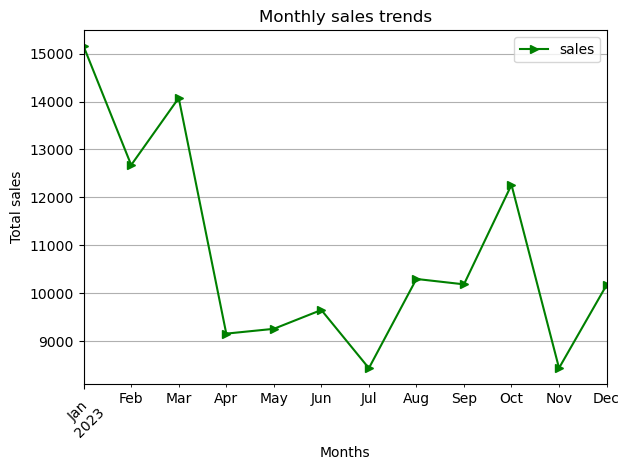

In [19]:
monthly_revenue = car.groupby('Month')['Final Revenue'].sum()
monthly_revenue.plot(ls='-',color='g', marker='>',label='sales')
pt.title("Monthly sales trends")
pt.xticks(rotation=45)
pt.xlabel("Months")
pt.ylabel("Total sales")
pt.grid(True)
pt.legend()
pt.tight_layout()
pt.show()

**2. Bar Chart** → Top 5 drivers by revenue (Seaborn preferred)

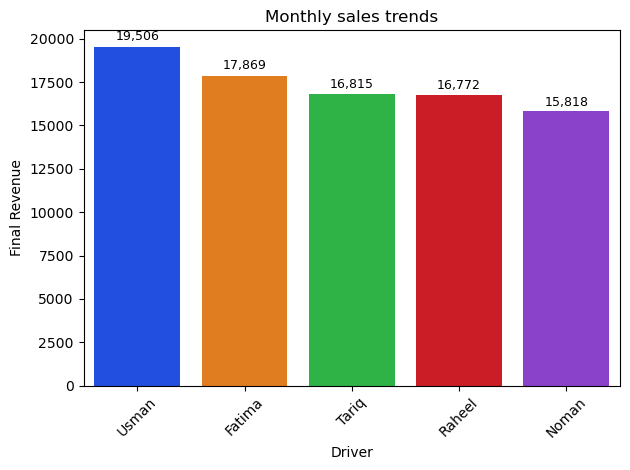

In [20]:
import seaborn as sb
Drivers = car.groupby('Driver')['Final Revenue'].sum().sort_values(ascending=False).head(5).reset_index()
for i, value in enumerate(Drivers['Final Revenue']):
    pt.text(i, value + (value * 0.02), f"{value:,.0f}", ha='center', fontsize=9)

sb.barplot(x='Driver', y='Final Revenue', data=Drivers, hue='Driver', palette='bright')
pt.title("Monthly sales trends")
pt.xticks(rotation=45)
pt.tight_layout()
pt.show()

**3. Pie Chart** → Rides distribution by `Car Type`

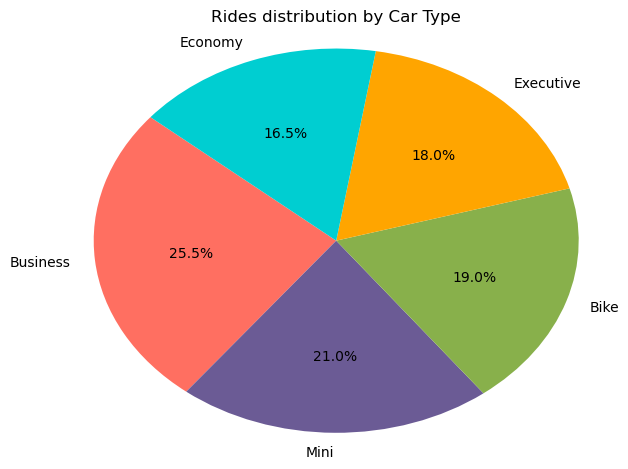

In [30]:
Rides = car.groupby('Car Type')['Rides'].sum().sort_values(ascending=False).head().reset_index()

pt.pie(Rides['Rides'],labels=Rides['Car Type'],autopct='%1.1f%%',startangle=140,colors=['#FF6F61', '#6B5B95', '#88B04B', '#FFA500', '#00CED1'])
pt.title("Rides distribution by Car Type")
pt.axis('auto')  
pt.tight_layout()
pt.show()

**4. Box Plot** → Fare variation across `Car Type` (Seaborn)

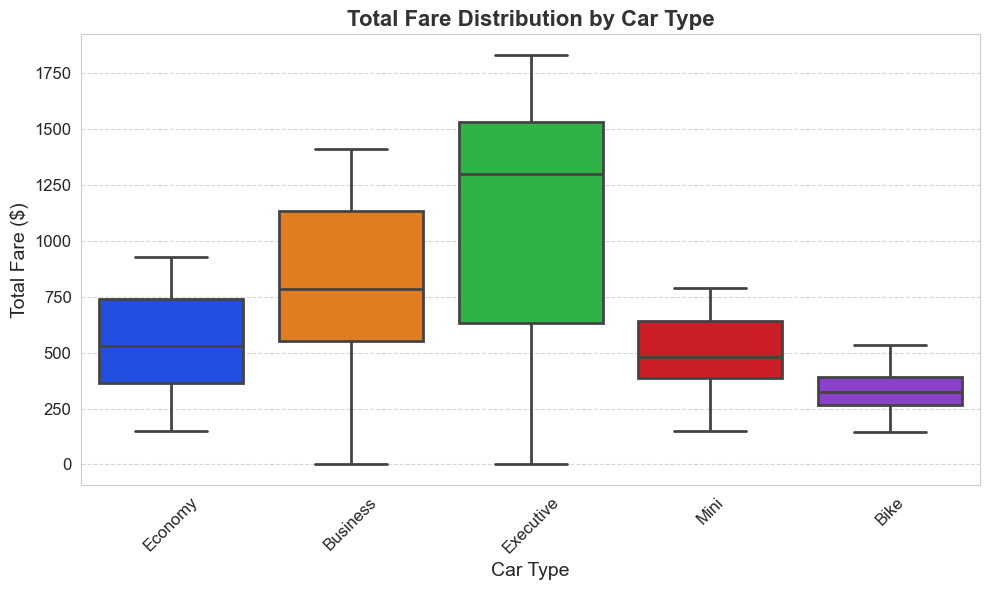

In [40]:
Fare = car.groupby(['Car Type'])['Total Fare'].sum().reset_index()
pt.figure(figsize=(10,6))
sb.set_style("whitegrid")
sb.boxplot(x='Car Type',y='Total Fare',data=car,hue='Car Type',palette='bright', linewidth=2,fliersize=4)

pt.title("Total Fare Distribution by Car Type", fontsize=16, fontweight='bold', color='#333333')
pt.xlabel("Car Type", fontsize=14)
pt.ylabel("Total Fare ($)", fontsize=14)
pt.xticks(rotation=45, fontsize=12)
pt.yticks(fontsize=12)
pt.grid(axis='y', linestyle='--', alpha=.8)

pt.tight_layout()
pt.show()